In [1]:
from diffusion.time_scheduler import quadratic_beta_schedule
from image_datasets.IXIdataset import IXIDataset
import torch
from torch.utils.data import DataLoader
from model.unet import Unet
from diffusion.diffusion import DiffusionModel
from torch.optim import Adam
from diffusion.sampler import sample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from diffusion.utils import *
import numpy as np

In [2]:
def name_dim_mults(dim_mults):
    name = ''
    for dim in dim_mults:
        name+=str(dim)
    return name

## Load Dataset

In [3]:
root = "./IXI-dataset-master/size64/"
dataset = IXIDataset(root, mode="train")

channels, image_size, _ = dataset[0]['T1'].shape

batch_size = 20

In [7]:
def return_loaders(train_size, test_size):
    train_set, val_set = train_test_split(dataset, train_size=train_size, test_size=test_size)

    train_set_batched = []
    for i in range(int(train_size_max/train_size)):
        train_set_batched.extend(train_set)
    train_set = train_set_batched
    
    print(len(train_set))
        
    train_loader = DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=False,
    )
    val_loader = DataLoader(
        val_set,
        batch_size=batch_size,
        shuffle=False,
    )
    
    return train_loader, val_loader

## Benchmark diffusion model

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"

train_size_max = 400

train_sizes = [1,10,50,100,400] #1,10,50,100,
test_sizes = {1:1,10:10,50:50,100:100,400:40}

400
[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.32it/s]


Train Loss: 0.2658354114741087


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.15it/s]


Train Loss: 0.14735008142888545


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.66it/s]


Train Loss: 0.12050567753612995


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.08521430641412735


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.61it/s]


Train Loss: 0.08455966860055923


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.07721835188567638


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.06484403908252716


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.06476739421486855


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.31it/s]


Train Loss: 0.06735740974545479


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.30it/s]


Train Loss: 0.06437723021954297


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.055522008799016476


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.10it/s]


Train Loss: 0.05383949000388384


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.25it/s]


Train Loss: 0.04893381521105766


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.17it/s]


Train Loss: 0.053281483426690104


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.21it/s]


Train Loss: 0.050366283394396305


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.20it/s]


Train Loss: 0.046752587892115116


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.24it/s]


Train Loss: 0.053267092630267146


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.48it/s]


Train Loss: 0.04986350471153855


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.04684106782078743


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.044645171239972116


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.0402258993126452


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.04740111231803894


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.61it/s]


Train Loss: 0.042413989454507826


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.03919045645743609


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.21it/s]


Train Loss: 0.04412816781550646


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.04395964927971363


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.49it/s]


Train Loss: 0.043803106620907785


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.03748566480353475


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.27it/s]


Train Loss: 0.044236709270626305


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.26it/s]


Train Loss: 0.04048193395137787


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.25it/s]


Train Loss: 0.040138316433876754


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.03932409267872572


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.19it/s]


Train Loss: 0.04042257182300091


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.041932796593755484


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.03741942439228296


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.16it/s]


Train Loss: 0.03853889778256416


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.037766822054982184


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.72it/s]


Train Loss: 0.03467187574133277


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.03454097183421254


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.039876965526491406


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.04187111230567098


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.036825865507125854


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.035063533764332536


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.40it/s]


Train Loss: 0.03586472566239536


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.11it/s]


Train Loss: 0.03555224733427167


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.22it/s]


Train Loss: 0.03207975486293435


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.036902711074799296


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.13it/s]


Train Loss: 0.029349467949941754


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.03633763175457716


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.21it/s]


Train Loss: 0.034727131761610505


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.0353797665797174


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.16it/s]


Train Loss: 0.03400291968137026


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.10it/s]


Train Loss: 0.03172343107871711


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.19it/s]


Train Loss: 0.033530816342681645


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.22it/s]


Train Loss: 0.03541802475228906


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.03424999401904642


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.03193883509375155


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.03626780137419701


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.0359980184584856


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.030998464813455938


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.03416575184091926


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.10it/s]


Train Loss: 0.031073674000799655


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.0379822077229619


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.03444258058443665


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.033879459090530875


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.031210608687251805


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.56it/s]


Train Loss: 0.031969946390017864


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.46it/s]


Train Loss: 0.030388005822896958


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.03141353731043637


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.03332031071186066


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.029556494718417526


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.027821847004815936


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.43it/s]


Train Loss: 0.035770589392632245


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.38it/s]


Train Loss: 0.02905700937844813


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.0302406495437026


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.22it/s]


Train Loss: 0.03221340058371425


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.02858454156666994


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.030012311413884163


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.28it/s]


Train Loss: 0.030668836971744894


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.032055284129455686


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.030528608709573746


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.16it/s]


Train Loss: 0.029115902539342643


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


Train Loss: 0.030110213812440632


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.03431075122207403


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.20it/s]


Train Loss: 0.030853863200172783


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.030529475770890713


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.03225003555417061


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.17it/s]


Train Loss: 0.02901356774382293


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.19it/s]


Train Loss: 0.03210601415485144


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.030661487206816673


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


Train Loss: 0.029635016899555923


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.029901892878115177


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.026803938066586853


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.027158062951639295


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.0302890264429152


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


Train Loss: 0.03387871594168246


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.78it/s]


Train Loss: 0.030974795576184988


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.031695475615561006


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.03223194144666195


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.37it/s]


Train Loss: 0.032408093381673095


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.027521801739931108


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.0326357068028301


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.028955226857215167


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.027400931622833014


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.029595914669334887


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.028991673979908227


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.029227128764614464


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


Train Loss: 0.0312199748121202


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.03158623278141022


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.56it/s]


Train Loss: 0.029025574633851647


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.03082528617233038


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.02928584455512464


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.16it/s]


Train Loss: 0.030013285297900438


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.11it/s]


Train Loss: 0.030667146341875194


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.02931773881427944


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.03149317903444171


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.032314458349719646


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.030640635546296834


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.033287320658564566


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.030670465528964998


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.48it/s]


Train Loss: 0.028510430129244924


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.035281039820984


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.030878821946680547


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.026908664777874947


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.42it/s]


Train Loss: 0.030973160918802024


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.24it/s]


Train Loss: 0.029471224825829267


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.028077139193192123


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.26it/s]


Train Loss: 0.031923593441024425


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.03230854878202081


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.03587371977046132


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.028524867817759515


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.15it/s]


Train Loss: 0.02584946872666478


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.026811159774661066


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.03157582529820502


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.027005031937733293


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.31it/s]


Train Loss: 0.03095188979059458


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.56it/s]


Train Loss: 0.02945103677920997


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.54it/s]


Train Loss: 0.030103333573788405


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.025520987762138247


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.030418036691844463


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.030532306618988515


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.026521804835647346


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.026688888017088176


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.033952885586768386


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.029071742109954356


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.030888301320374012


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.028711721207946538


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.57it/s]


Train Loss: 0.026853356696665286


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.029249707190319895


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.026325235795229673


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.02817523214034736


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.13it/s]


Train Loss: 0.030934320949018


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.03160133734345436


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.11it/s]


Train Loss: 0.030527099315077067


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.17it/s]


Train Loss: 0.02985800839960575


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.02863257871940732


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.09it/s]


Train Loss: 0.030375649221241474


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.030791099462658168


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03020070237107575


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.029261841205880046


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.030813415255397558


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.02694631810300052


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.38it/s]


Train Loss: 0.026489655114710332


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.34it/s]


Train Loss: 0.026237951638177038


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.029096800787374377


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.03157244762405753


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.028791069239377975


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.025017779413610698


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.15it/s]


Train Loss: 0.02506979671306908


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.029070797329768538


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.02889139037579298


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.09it/s]


Train Loss: 0.029526737378910185


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.026292541390284897


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.02268512877635658


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


Train Loss: 0.028042680770158767


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.027569820964708926


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.025622857129201294


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.03564054686576128


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.03129680403508246


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.24it/s]


Train Loss: 0.03076511896215379


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


Train Loss: 0.026574766775593162


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.027019180404022337


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.028840050240978597


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.026084377663210034


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.026032841810956598


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.030155681911855935


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.22it/s]


Train Loss: 0.03213237524032593


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.024549462646245957


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.02842659722082317


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.02426464236341417


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.14it/s]


Train Loss: 0.027492687851190568


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.38it/s]


Train Loss: 0.027809854503720997


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.031475265556946394


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.10it/s]


Train Loss: 0.02909495015628636


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.48it/s]


Train Loss: 0.03147867727093399


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.02753734765574336


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.03023693379946053


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.02667607911862433


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.024000735580921174


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.028146097948774696
End of training!
1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.85it/s]


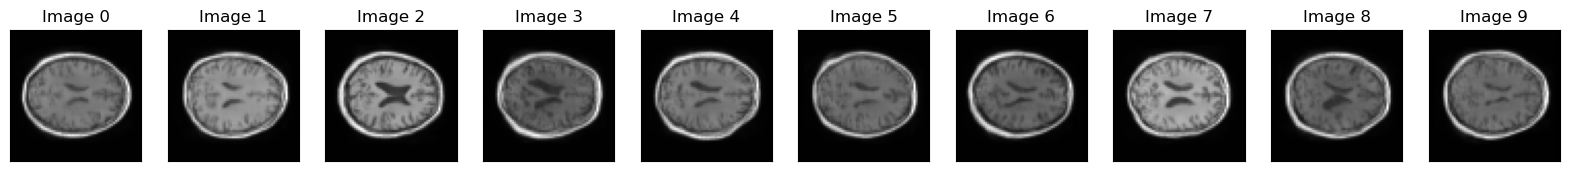

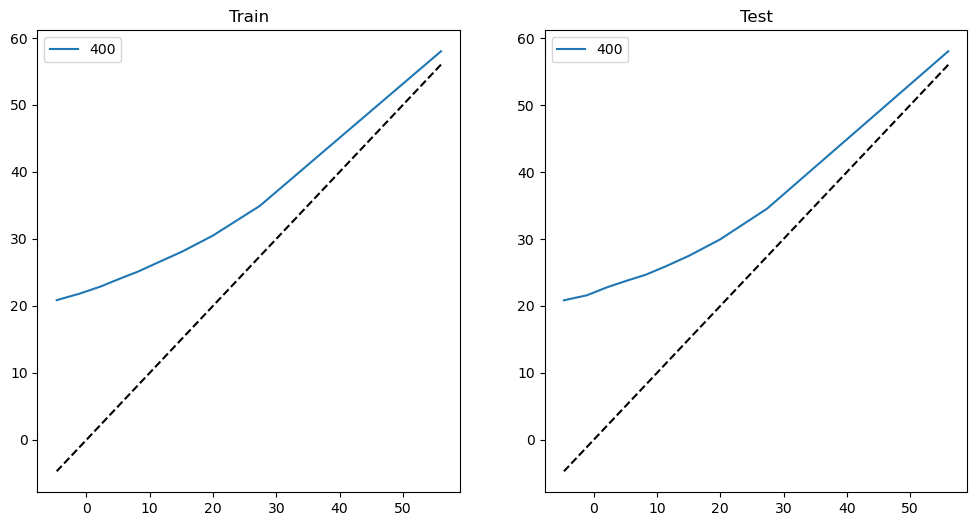

In [19]:
for dim_mults in [(1,2,4,)]:#, (1,2,2,), (1,1,2,), (1,4,), (1,2,)]: #
    for timesteps in [1000]:#,1000,2000]:
        for epochs in [200]:#,300,600,900]:
            psnr_in_train_varying_dataset = np.zeros((len(train_sizes),10))
            psnr_out_train_varying_dataset = np.zeros((len(train_sizes),10))
            psnr_in_test_varying_dataset = np.zeros((len(train_sizes),10))
            psnr_out_test_varying_dataset = np.zeros((len(train_sizes),10))
            
            for idx_train_size, train_size in enumerate(train_sizes):
                
                train_loader, val_loader = return_loaders(train_size, test_sizes[train_size])
                betas = quadratic_beta_schedule(timesteps, beta_start=0.00001, beta_end=0.01)

                model = Unet(
                    dim=image_size,
                    channels=channels,
                    dim_mults=dim_mults
                )

                model.to(device)

                nb_param = sum(p.numel() for p in model.parameters() if p.requires_grad)

                ddpm = DiffusionModel(model, timesteps, betas, device, loss_type='huber')

                optimizer = Adam(model.parameters(), lr=3e-4)

                ddpm.train(epochs, optimizer, train_loader)

                # sample 10 images
                samples = sample(ddpm, image_size=image_size, batch_size=10, channels=channels)

                # check generalization
                psnr_in_train, psnr_out_train = ddpm.compute_psnr(train_loader, freq=int(timesteps/10))
                psnr_in_val, psnr_out_val = ddpm.compute_psnr(val_loader, freq=int(timesteps/10))

                psnr_in_train_varying_dataset[idx_train_size] = np.array([x.numpy() for x in psnr_in_train])
                psnr_out_train_varying_dataset[idx_train_size] = np.array([x.numpy() for x in psnr_out_train])

                psnr_in_test_varying_dataset[idx_train_size] = np.array([x.numpy() for x in psnr_in_val])
                psnr_out_test_varying_dataset[idx_train_size] = np.array([x.numpy() for x in psnr_out_val])

                start = 0
                end = -1

                fig, axs = plt.subplots(1, 10, figsize=(20, 8))
                for i in range(10):
                    axs[i].get_xaxis().set_visible(False)
                    axs[i].get_yaxis().set_visible(False)
                    axs[i].set_title(f"Image {i}")
                    axs[i].imshow(samples[-1][i].reshape(image_size, image_size, channels), cmap="gray")

                name_fig = "benchmark_images_gen/medical_UNet_synthesis_" + name_dim_mults(dim_mults)
                name_fig += "_attn_mdn_1_resblock_"+str(timesteps)+"_steps_"+str(epochs)+"_epochs"

                #fig.savefig(name_fig+".png")

                plt.show()
                
            plt.figure(figsize=(12,6))
            plt.subplot(121)
            plt.plot(psnr_in_train_varying_dataset[0], psnr_in_train_varying_dataset[0], linestyle='dashed', c='black')
            for idx_train_size, train_size in enumerate(train_sizes):
                plt.plot(psnr_in_train_varying_dataset[idx_train_size], psnr_out_train_varying_dataset[idx_train_size],\
                            label=str(train_size))
            plt.title('Train')
            plt.legend(loc='best')
            plt.subplot(122)
            plt.plot(psnr_in_train_varying_dataset[0], psnr_in_train_varying_dataset[0], linestyle='dashed', c='black')
            for idx_train_size, train_size in enumerate(train_sizes):
                plt.plot(psnr_in_test_varying_dataset[idx_train_size], psnr_out_test_varying_dataset[idx_train_size],\
                            label=str(train_size))
            plt.title('Test')
            plt.legend(loc='best')
            plt.show()

In [ ]:
torch.save(ddpm.state_dict(), name_dim_mults(dim_mults)+"attn_mdn_1_resblock_"+str(timesteps)+"_steps_"+str(epochs)+"_epochs")

In [ ]:
for x in train_loader:
    plt.imshow(x['T1'][0,0])
    plt.show()

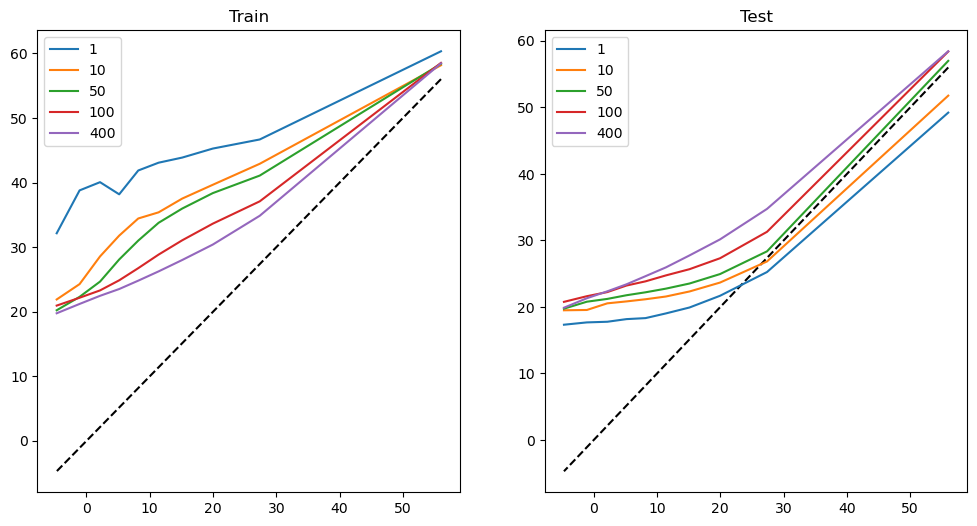

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(psnr_in_train_varying_dataset[0], psnr_in_train_varying_dataset[0], linestyle='dashed', c='black')
for idx_train_size, train_size in enumerate(train_sizes):
    plt.plot(psnr_in_train_varying_dataset[idx_train_size], psnr_out_train_varying_dataset[idx_train_size],\
                label=str(train_size))
plt.title('Train')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(psnr_in_train_varying_dataset[0], psnr_in_train_varying_dataset[0], linestyle='dashed', c='black')
for idx_train_size, train_size in enumerate(train_sizes):
    plt.plot(psnr_in_test_varying_dataset[idx_train_size], psnr_out_test_varying_dataset[idx_train_size],\
                label=str(train_size))
plt.title('Test')
plt.legend(loc='best')
plt.show()

In [17]:
"""torch.save(psnr_in_train_varying_dataset, 'psnr_in_train_varying_dataset')
torch.save(psnr_out_train_varying_dataset, 'psnr_out_train_varying_dataset')
torch.save(psnr_in_test_varying_dataset, 'psnr_in_test_varying_dataset')
torch.save(psnr_out_test_varying_dataset, 'psnr_out_test_varying_dataset')"""